L is a funny list and itemgot is a method which creates a new L with item x of all items.

In [1]:
%pip install -Uqq duckduckgo_search fastai numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(key, max = 30):
    print(f"Searching for {key}")
    return L(ddg_images(key, max_results = max)).itemgot('image')

In [3]:
urls = search_images("black person", max = 1)
urls[0]

Searching for black person


'https://dm0qx8t0i9gc9.cloudfront.net/thumbnails/video/rZJIMvhmliwmde8a6/videoblocks-happy-black-african-man-in-suit-portrait-of-excited-cheerful-man-indoor-against-window-background_sh2ahadmq_thumbnail-1080_01.png'

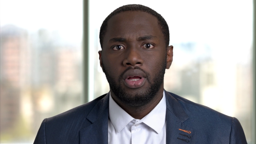

In [12]:
from fastdownload import download_url
dest = 'black_person.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
img = Image.open(dest)
img.to_thumb(256,256)

Searching for gorilla


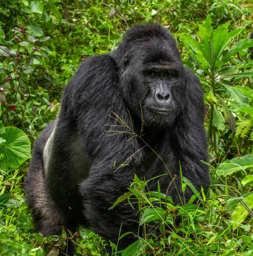

In [10]:
download_url(search_images("gorilla", max = 1)[0], 'gorilla.jpg', show_progress=False)
Image.open('gorilla.jpg').to_thumb(256,256)

In [13]:
searches = 'gorilla', 'black person'
path = Path('racism')

from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(parents=True, exist_ok=True)
    download_images(dest, urls=search_images(o, max = 200))

    resize_images(path/o, max_size=400, dest=path/o)

Searching for gorilla
Searching for black person


In [14]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

3

Blocks: hvilken type input/output, get_items: hvordan får den dataen?, splitter: lav validation/training datasæt, get_y: find labels, item_transformations: lav billederne homogene

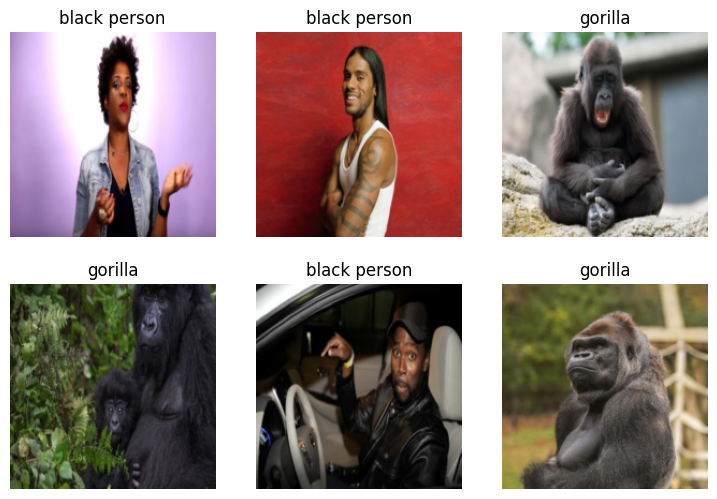

In [15]:
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = [Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [16]:
learner = vision_learner(dls, resnet18, metrics=error_rate)
learner.fine_tune(3)

c:\Users\Lassen\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Lassen\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\Lassen/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:06<00:00, 7.41MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.464405,0.032985,0.017241,00:13


epoch,train_loss,valid_loss,error_rate,time
0,0.029101,0.072141,0.034483,00:17
1,0.037420,0.033577,0.017241,00:16
2,0.024071,0.064098,0.017241,00:16


In [20]:
is_ape,_,probs = learner.predict('gorilla.jpg')
print(f"This is a: {is_ape}.")
print(f"Probability it's a gorilla: {probs[1]:.4f}")

is_ape,_,probs = learner.predict('black_person.jpg')
print(f"This is a: {is_ape}.")
print(f"Probability it's a gorilla: {probs[1]:.4f}")


This is a: gorilla.
Probability it's a gorilla: 1.0000


This is a: black person.
Probability it's a gorilla: 0.0002


This is a: black person.
Probability it's a gorilla: 0.0255


This is a: black person.
Probability it's a gorilla: 0.0000
